# Communicate-Data-Findings-Ford-GoBike-System
## by Mohamed Abdelkader

## Investigation Overview

> Explore data and Understand how it correlate each other and bring best out of it ..

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area..

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

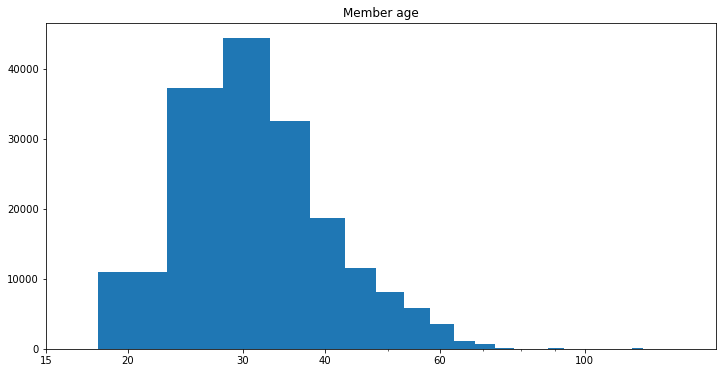

In [11]:
# Adding bins as in Univariant lesson class no 13 Scales and Transformations
# Adding ticks 
df['Age'] = 2019 - df.member_birth_year
bin_size = 5
bins = np.arange(df.Age.min(),df.Age.max() + bin_size, bin_size)
ticks = [15,20,30,40,60,100]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = bins);
plt.title('Member age');
plt.xscale('log');
# as we see it became more normalized
plt.xticks(ticks, labels);
# now figure became much better visualizing 

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!